In [1]:
import os
import sys
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, minmax_scale
from datetime import datetime

from holodecml.data import load_scaled_datasets, load_raw_datasets, calc_z_bins

In [2]:
path_data = "/glade/p/cisl/aiml/ai4ess_hackathon/holodec/"
num_particles = 3
output_cols = ["hid", "x", "y", "z", "d"]
scaler_out = False
subset = False
num_z_bins = 20

In [4]:
train_inputs,\
train_outputs,\
valid_inputs,\
valid_outputs = load_scaled_datasets(path_data,
                                     num_particles,
                                     output_cols,
                                     scaler_out,
                                     subset,
                                     num_z_bins)

In [5]:
model_path = "/glade/p/cisl/aiml/ggantos/holodec/zmass_3_new/"
models = [x[0] for x in os.walk(model_path)][1:]
models

['/glade/p/cisl/aiml/ggantos/holodec/zmass_3_new/base3',
 '/glade/p/cisl/aiml/ggantos/holodec/zmass_3_new/base1',
 '/glade/p/cisl/aiml/ggantos/holodec/zmass_3_new/filters81216',
 '/glade/p/cisl/aiml/ggantos/holodec/zmass_3_new/base4',
 '/glade/p/cisl/aiml/ggantos/holodec/zmass_3_new/base2',
 '/glade/p/cisl/aiml/ggantos/holodec/zmass_3_new/dense168',
 '/glade/p/cisl/aiml/ggantos/holodec/zmass_3_new/base',
 '/glade/p/cisl/aiml/ggantos/holodec/zmass_3_new/dense3216filters81216',
 '/glade/p/cisl/aiml/ggantos/holodec/zmass_3_new/dense3216']

In [6]:
models = ["/glade/p/cisl/aiml/ggantos/holodec/zmass_3_new/base1",
          "/glade/p/cisl/aiml/ggantos/holodec/zmass_3_new/base2",
          "/glade/p/cisl/aiml/ggantos/holodec/zmass_3_new/base3",
          "/glade/p/cisl/aiml/ggantos/holodec/zmass_3_new/base4"]

In [7]:
! ls /glade/p/cisl/aiml/ggantos/holodec/zmass_3_new/base3

cnn.h5	config.yml  hist.pkl  train_outputs_pred.pkl  valid_outputs_pred.pkl


In [8]:
import yaml
config_file = "/glade/p/cisl/aiml/ggantos/holodec/zmass_3_new/base4/config.yml"
config = yaml.load(open(config_file), Loader=yaml.FullLoader)
config

{'conv2d_network': {'batch_size': 256,
  'conv2d_activation': 'relu',
  'decay': 0.1,
  'dense_activation': 'elu',
  'dense_sizes': [64, 32],
  'epochs': 20,
  'filters': [8, 12, 16],
  'kernel_sizes': [5, 5, 5],
  'loss': 'categorical_crossentropy',
  'lr': 0.0003,
  'optimizer': 'adam',
  'pool_sizes': [4, 4, 4],
  'verbose': 1},
 'metric': 'mae',
 'model_name': 'cnn',
 'num_particles': 3,
 'num_z_bins': 20,
 'output_cols': ['x', 'y', 'z', 'd', 'hid'],
 'path_data': '/glade/p/cisl/aiml/ai4ess_hackathon/holodec/',
 'path_save': '/glade/p/cisl/aiml/ggantos/holodec/zmass_3_new/base4/',
 'random_seed': 328942,
 'scaler_out': 'MinMaxScaler',
 'subset': False}

In [9]:
valid_outputs_pred_base1 = pickle.load(open("/glade/p/cisl/aiml/ggantos/holodec/zmass_3_new/base1/valid_outputs_pred.pkl", "rb"))
valid_outputs_pred_base2 = pickle.load(open("/glade/p/cisl/aiml/ggantos/holodec/zmass_3_new/base2/valid_outputs_pred.pkl", "rb"))
valid_outputs_pred_base3 = pickle.load(open("/glade/p/cisl/aiml/ggantos/holodec/zmass_3_new/base3/valid_outputs_pred.pkl", "rb"))
valid_outputs_pred_base4 = pickle.load(open("/glade/p/cisl/aiml/ggantos/holodec/zmass_3_new/base4/valid_outputs_pred.pkl", "rb"))


In [10]:
train_inputs_raw, train_outputs_raw = load_raw_datasets(path_data, num_particles, "train", subset, output_cols)
valid_inputs_raw, valid_outputs_raw = load_raw_datasets(path_data, num_particles, "valid", subset, output_cols)

In [11]:
z_bins = calc_z_bins(train_outputs_raw, valid_outputs_raw, num_z_bins)

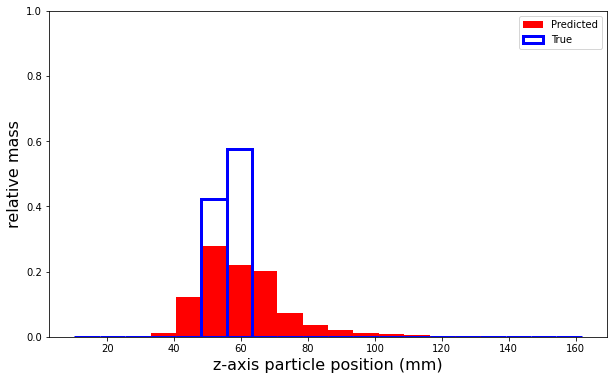

In [12]:
valid_index = 11
bin_size = z_bins[1] - z_bins[0]
plt.figure(figsize=(10, 6))
plt.bar(z_bins / 1000, valid_outputs_pred_base1[valid_index], bin_size / 1000, color='red', label="Predicted")
plt.bar(z_bins / 1000, valid_outputs[valid_index], bin_size / 1000, edgecolor='blue', facecolor="none", lw=3, label="True")
plt.ylim(0, 1)
plt.xlabel("z-axis particle position (mm)", fontsize=16)
plt.ylabel("relative mass", fontsize=16)
plt.legend(loc="best")


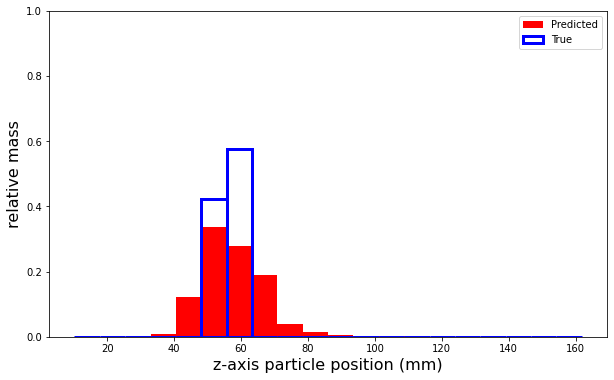

In [13]:
valid_index = 11
bin_size = z_bins[1] - z_bins[0]
plt.figure(figsize=(10, 6))
plt.bar(z_bins / 1000, valid_outputs_pred_base2[valid_index], bin_size / 1000, color='red', label="Predicted")
plt.bar(z_bins / 1000, valid_outputs[valid_index], bin_size / 1000, edgecolor='blue', facecolor="none", lw=3, label="True")
plt.ylim(0, 1)
plt.xlabel("z-axis particle position (mm)", fontsize=16)
plt.ylabel("relative mass", fontsize=16)
plt.legend(loc="best")


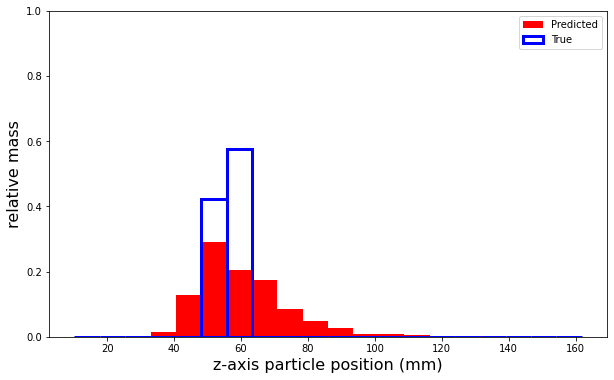

In [14]:
valid_index = 11
bin_size = z_bins[1] - z_bins[0]
plt.figure(figsize=(10, 6))
plt.bar(z_bins / 1000, valid_outputs_pred_base3[valid_index], bin_size / 1000, color='red', label="Predicted")
plt.bar(z_bins / 1000, valid_outputs[valid_index], bin_size / 1000, edgecolor='blue', facecolor="none", lw=3, label="True")
plt.ylim(0, 1)
plt.xlabel("z-axis particle position (mm)", fontsize=16)
plt.ylabel("relative mass", fontsize=16)
plt.legend(loc="best")


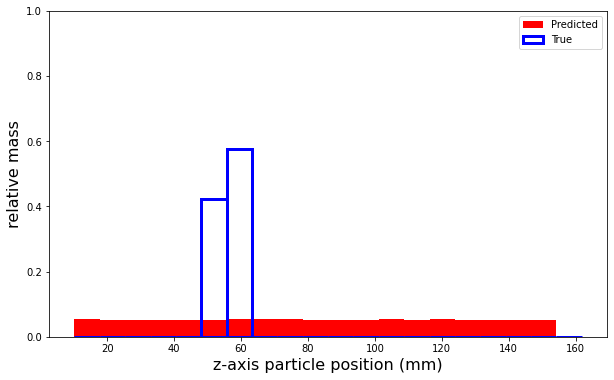

In [15]:
valid_index = 11
bin_size = z_bins[1] - z_bins[0]
plt.figure(figsize=(10, 6))
plt.bar(z_bins / 1000, valid_outputs_pred_base4[valid_index], bin_size / 1000, color='red', label="Predicted")
plt.bar(z_bins / 1000, valid_outputs[valid_index], bin_size / 1000, edgecolor='blue', facecolor="none", lw=3, label="True")
plt.ylim(0, 1)
plt.xlabel("z-axis particle position (mm)", fontsize=16)
plt.ylabel("relative mass", fontsize=16)
plt.legend(loc="best")


Text(0, 0.5, 'Mean Relative Mass')

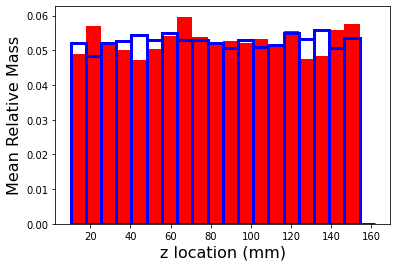

In [16]:
plt.bar(z_bins / 1000, valid_outputs_pred_base1.mean(axis=0), (z_bins[1] - z_bins[0]) / 1000, color='red')
plt.bar(z_bins / 1000, valid_outputs.mean(axis=0), (z_bins[1]-z_bins[0]) / 1000, edgecolor='blue', facecolor="none", lw=3)
plt.xlabel("z location (mm)", fontsize=16)
plt.ylabel("Mean Relative Mass", fontsize=16)

Text(0, 0.5, 'Mean Relative Mass')

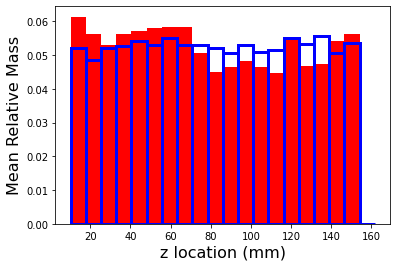

In [17]:
plt.bar(z_bins / 1000, valid_outputs_pred_base2.mean(axis=0), (z_bins[1] - z_bins[0]) / 1000, color='red')
plt.bar(z_bins / 1000, valid_outputs.mean(axis=0), (z_bins[1]-z_bins[0]) / 1000, edgecolor='blue', facecolor="none", lw=3)
plt.xlabel("z location (mm)", fontsize=16)
plt.ylabel("Mean Relative Mass", fontsize=16)

Text(0, 0.5, 'Mean Relative Mass')

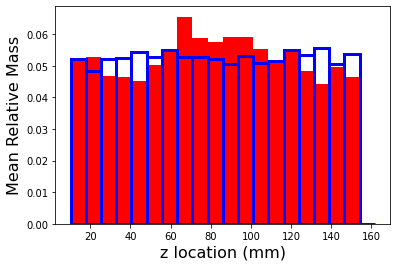

In [18]:
plt.bar(z_bins / 1000, valid_outputs_pred_base3.mean(axis=0), (z_bins[1] - z_bins[0]) / 1000, color='red')
plt.bar(z_bins / 1000, valid_outputs.mean(axis=0), (z_bins[1]-z_bins[0]) / 1000, edgecolor='blue', facecolor="none", lw=3)
plt.xlabel("z location (mm)", fontsize=16)
plt.ylabel("Mean Relative Mass", fontsize=16)

Text(0, 0.5, 'Mean Relative Mass')

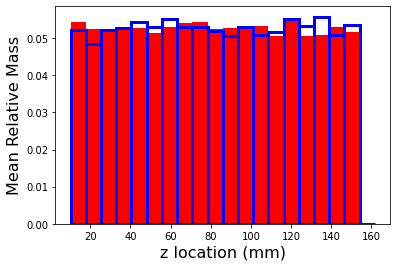

In [19]:
plt.bar(z_bins / 1000, valid_outputs_pred_base4.mean(axis=0), (z_bins[1] - z_bins[0]) / 1000, color='red')
plt.bar(z_bins / 1000, valid_outputs.mean(axis=0), (z_bins[1]-z_bins[0]) / 1000, edgecolor='blue', facecolor="none", lw=3)
plt.xlabel("z location (mm)", fontsize=16)
plt.ylabel("Mean Relative Mass", fontsize=16)

In [20]:
def ranked_probability_score(y_true, y_pred):
    return np.mean((np.cumsum(y_true, axis=1) - np.cumsum(y_pred, axis=1)) ** 2) / (y_true.shape[1] -1)

In [21]:
rps_nn = ranked_probability_score(valid_outputs, valid_outputs_pred_base1)
rps_climo = ranked_probability_score(valid_outputs, np.ones(valid_outputs_pred_base1.shape) / valid_outputs_pred_base1.shape[1])
print(rps_nn, rps_climo)
rpss = 1 - rps_nn / rps_climo
print(f"RPSS: {rpss:0.3f}")

0.0012822739387813367 0.004072869221491917
RPSS: 0.685


In [22]:
rps_nn = ranked_probability_score(valid_outputs, valid_outputs_pred_base2)
rps_climo = ranked_probability_score(valid_outputs, np.ones(valid_outputs_pred_base2.shape) / valid_outputs_pred_base2.shape[1])
print(rps_nn, rps_climo)
rpss = 1 - rps_nn / rps_climo
print(f"RPSS: {rpss:0.3f}")


0.0012952257928095367 0.004072869221491917
RPSS: 0.682


In [23]:
rps_nn = ranked_probability_score(valid_outputs, valid_outputs_pred_base3)
rps_climo = ranked_probability_score(valid_outputs, np.ones(valid_outputs_pred_base3.shape) / valid_outputs_pred_base3.shape[1])
print(rps_nn, rps_climo)
rpss = 1 - rps_nn / rps_climo
print(f"RPSS: {rpss:0.3f}")

0.001420088798591965 0.004072869221491917
RPSS: 0.651


In [24]:
rps_nn = ranked_probability_score(valid_outputs, valid_outputs_pred_base4)
rps_climo = ranked_probability_score(valid_outputs, np.ones(valid_outputs_pred_base4.shape) / valid_outputs_pred_base4.shape[1])
print(rps_nn, rps_climo)
rpss = 1 - rps_nn / rps_climo
print(f"RPSS: {rpss:0.3f}")

0.00403377060827456 0.004072869221491917
RPSS: 0.010


In [25]:
ytrue = np.array([[.2, 0, .3, .5, 0],
                  [0, .1, .6, 0, .3],
                  [.1, .2, .7, 0, 0]])
ypred_perf = np.array([[.2, 0, .3, .5, 0],
                       [0, .1, .6, 0, .3],
                       [.1, .2, .7, 0, 0]])
ypred_close = np.array([[.3, 0, .4, .3, 0],
                        [0, .2, .4, 0, .4],
                        [.3, .1, .6, 0, 0]])
ypred_far = np.array([[0, .1, .5, 0, .4],
                      [.1, 0, .4, .5, 0],
                      [.4, 0, 0, .3, .3]])

In [26]:
rps_nn = ranked_probability_score(ytrue, ypred_perf)
rps_climo = ranked_probability_score(ytrue, np.ones(ypred_perf.shape) / ypred_perf.shape[1])
print(f"RPS_nn:{rps_nn:0.3f}")
print(f"RPS_climo:{rps_climo:0.3f}")
rpss = 1 - rps_nn / rps_climo
print(f"RPSS: {rpss:0.3f}")

RPS_nn:0.000
RPS_climo:0.008
RPSS: 1.000


In [27]:
rps_nn = ranked_probability_score(ytrue, ypred_close)
rps_climo = ranked_probability_score(ytrue, np.ones(ypred_close.shape) / ypred_close.shape[1])
print(f"RPS_nn:{rps_nn:0.3f}")
print(f"RPS_climo:{rps_climo:0.3f}")
rpss = 1 - rps_nn / rps_climo
print(f"RPSS: {rpss:0.3f}")

RPS_nn:0.002
RPS_climo:0.008
RPSS: 0.696


In [28]:
rps_nn = ranked_probability_score(ytrue, ypred_far)
rps_climo = ranked_probability_score(ytrue, np.ones(ypred_far.shape) / ypred_far.shape[1])
print(f"RPS_nn:{rps_nn:0.3f}")
print(f"RPS_climo:{rps_climo:0.3f}")
rpss = 1 - rps_nn / rps_climo
print(f"RPSS: {rpss:0.3f}")

RPS_nn:0.015
RPS_climo:0.008
RPSS: -0.978
